# Fig. 8: MEA data analysis of G32

# import

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pickle5
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load data

In [4]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'

with open(file_path+'/widths.pkl', 'rb') as handle:
    tSTA_width = pickle5.load(handle)

In [5]:
tSTA_width[0]['c1']

array([0.18794202, 0.16500557, 0.17558488, 0.13903983, 0.12516764,
       0.13444919, 0.13492958, 0.12844713, 0.15137282, 0.19116724,
       0.21205518, 0.31442065, 0.23886613])

In [6]:
df_cluster1 = pd.DataFrame(tSTA_width[0])
df_cluster2 = pd.DataFrame(tSTA_width[1])
df_cluster3 = pd.DataFrame(tSTA_width[2])

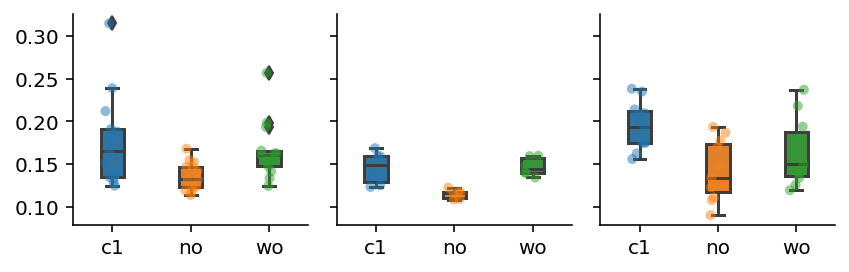

In [7]:
fig,ax=plt.subplots(1,3,figsize=(6,2),sharey=True)
sns.boxplot(df_cluster1,ax=ax[0],width=0.3)
sns.stripplot(df_cluster1,ax=ax[0],alpha=0.5,edgecolor='k')

sns.boxplot(df_cluster2,ax=ax[1],width=0.3)
sns.stripplot(df_cluster2,ax=ax[1],alpha=0.5,edgecolor='k')

sns.boxplot(df_cluster3,ax=ax[2],width=0.3)
sns.stripplot(df_cluster3,ax=ax[2],alpha=0.5,edgecolor='k')

sns.despine()
fig.tight_layout()

# Perform ANOVA repeated measures

In [8]:
from statsmodels.stats.anova import AnovaRM

In [9]:
cell_id_c1 = np.asarray([np.arange(1,tSTA_width[0]['c1'].shape[0]+1,1),np.arange(1,tSTA_width[0]['c1'].shape[0]+1,1),np.arange(1,tSTA_width[0]['c1'].shape[0]+1,1)]).flatten()
cell_id_c2 = np.asarray([np.arange(1,tSTA_width[1]['c1'].shape[0]+1,1),np.arange(1,tSTA_width[1]['c1'].shape[0]+1,1),np.arange(1,tSTA_width[1]['c1'].shape[0]+1,1)]).flatten()
cell_id_c3 = np.asarray([np.arange(1,tSTA_width[2]['c1'].shape[0]+1,1),np.arange(1,tSTA_width[2]['c1'].shape[0]+1,1),np.arange(1,tSTA_width[2]['c1'].shape[0]+1,1)]).flatten()

In [10]:
data_cluster1 = {
  "cell_id":cell_id_c1,
  "width": np.asarray([tSTA_width[0]['c1'],tSTA_width[0]['no'],tSTA_width[0]['wo']]).flatten(),
  "condition": ['c1']*tSTA_width[0]['c1'].shape[0] + ['no']*tSTA_width[0]['c1'].shape[0] + ['wo']*tSTA_width[0]['c1'].shape[0]
}

data_cluster2 = {
  "cell_id":cell_id_c2,
  "width": np.asarray([tSTA_width[1]['c1'],tSTA_width[1]['no'],tSTA_width[1]['wo']]).flatten(),
  "condition": ['c1']*tSTA_width[1]['c1'].shape[0] + ['no']*tSTA_width[1]['c1'].shape[0] + ['wo']*tSTA_width[1]['c1'].shape[0]
}

data_cluster3 = {
  "cell_id":cell_id_c3,
  "width": np.asarray([tSTA_width[2]['c1'],tSTA_width[2]['no'],tSTA_width[2]['wo']]).flatten(),
  "condition": ['c1']*tSTA_width[2]['c1'].shape[0] + ['no']*tSTA_width[2]['c1'].shape[0] + ['wo']*tSTA_width[2]['c1'].shape[0]
}

In [11]:
df_cluster1 = pd.DataFrame(data_cluster1)
df_cluster2 = pd.DataFrame(data_cluster2)
df_cluster3 = pd.DataFrame(data_cluster3)

In [12]:
print(AnovaRM(data=df_cluster1, depvar='width', 
              subject='cell_id', within=['condition']).fit()) 

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  5.3849 2.0000 24.0000 0.0117



In [13]:
print(AnovaRM(data=df_cluster2, depvar='width', 
              subject='cell_id', within=['condition']).fit()) 

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition 13.1920 2.0000 10.0000 0.0016



In [14]:
print(AnovaRM(data=df_cluster3, depvar='width', 
              subject='cell_id', within=['condition']).fit()) 

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  8.3471 2.0000 20.0000 0.0023



# Perform post-hoc Dunn's test

In [15]:
import scikit_posthocs as sp

In [16]:
data_cluster1 = [tSTA_width[0]['c1'], tSTA_width[0]['no'], tSTA_width[0]['wo']]
dunn_results_cluster_1 = sp.posthoc_dunn(data_cluster1, p_adjust = 'bonferroni')

data_cluster2 = [tSTA_width[1]['c1'], tSTA_width[1]['no'], tSTA_width[1]['wo']]
dunn_results_cluster_2 = sp.posthoc_dunn(data_cluster2, p_adjust = 'bonferroni')

data_cluster3 = [tSTA_width[2]['c1'], tSTA_width[2]['no'], tSTA_width[2]['wo']]
dunn_results_cluster_3 = sp.posthoc_dunn(data_cluster3, p_adjust = 'bonferroni')

In [17]:
print("Dunn's test")
print('--------------------------')
print('Cluster 1')
print('Ctrl vs. NO; p-value: '+str(dunn_results_cluster_1.iloc[0,1])+' -> sign_diff; *')
print('Ctrl vs. WO; p-value: '+str(dunn_results_cluster_1.iloc[0,2])+' -> n.s.')
print('NO vs. WO; p-value: '+str(dunn_results_cluster_1.iloc[1,2])+' -> sign_diff, *')

Dunn's test
--------------------------
Cluster 1
Ctrl vs. NO; p-value: 0.02680905838229468 -> sign_diff; *
Ctrl vs. WO; p-value: 1.0 -> n.s.
NO vs. WO; p-value: 0.02422766263685329 -> sign_diff, *


In [18]:
print("Dunn's test")
print('--------------------------')
print('Cluster 2')
print('Ctrl vs. NO; p-value: '+str(dunn_results_cluster_2.iloc[0,1])+' -> sign_diff, *')
print('Ctrl vs. WO; p-value: '+str(dunn_results_cluster_2.iloc[0,2])+' -> n.s.')
print('NO vs. WO; p-value: '+str(dunn_results_cluster_2.iloc[1,2])+' -> sign_diff, **')

Dunn's test
--------------------------
Cluster 2
Ctrl vs. NO; p-value: 0.014777793306509395 -> sign_diff, *
Ctrl vs. WO; p-value: 1.0 -> n.s.
NO vs. WO; p-value: 0.00738208812406343 -> sign_diff, **


In [19]:
print("Dunn's test")
print('--------------------------')
print('Cluster 3')
print('Ctrl vs. NO; p-value: '+str(dunn_results_cluster_3.iloc[0,1])+' -> sign_diff, **')
print('Ctrl vs. WO; p-value: '+str(dunn_results_cluster_3.iloc[0,2])+' -> n.s.')
print('NO vs. WO; p-value: '+str(dunn_results_cluster_3.iloc[1,2])+' -> n.s.')

Dunn's test
--------------------------
Cluster 3
Ctrl vs. NO; p-value: 0.008136099251247579 -> sign_diff, **
Ctrl vs. WO; p-value: 0.23324874673552665 -> n.s.
NO vs. WO; p-value: 0.6507965741077923 -> n.s.
